In [1]:
import sys, os
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

The goal here is to download the data from the National Solar Radiation website and data here contains the temperature, Solar Zenith Angle, wind speed, etc. Based on the temperature and zenith angle, our aim is to find out the most promising location to set up the solar panel on a large scale. The final goal of the project is to combine this solar radiation data and rooftop database to explore and predict the solar market in a zip code. One solar panel can be built if the house has a PV rooftop. 

Here based on New york latitude and longitude (40.730610, -73.935242), I am scrapping the radiation data for the years 2010 to 2021 for only that location is due to a memory problem in my personal computer. But the final goal will be to take radiation data of several years and ingest the data into AWS cloud service and develop the ETL pipeline for large datasets and using Airflow for scheduling jobs.



In [2]:
# This code is adopted from NSRB python webscrapping tutorial.
# Define the lat, long of the location and the year
lat, lon = 40.730610, -73.935242
# You must request an NSRDB api key from the link above. Here I delte from key
api_key = '..'
# Set the attributes to extract (e.g., dhi, ghi, etc.), separated by commas.
attributes = 'ghi,dhi,dni,wind_speed,air_temperature,solar_zenith_angle'

# Set leap year to true or false. True will return leap day data if present, false will not.
leap_year = 'false'
# Set time interval in minutes, i.e., '30' is half hour intervals. Valid intervals are 30 & 60.
interval = '60'
# Specify Coordinated Universal Time (UTC), 'true' will use UTC, 'false' will use the local time zone of the data.
# NOTE: In order to use the NSRDB data in SAM, you must specify UTC as 'false'. SAM requires the data to be in the
# local time zone.
utc = 'false'
# Your full name, use '+' instead of spaces.
your_name = 'Umesh+Khaniya'
# Your reason for using the NSRDB.
reason_for_use = 'project+work'
# Your affiliation
your_affiliation = 'Cuny'
# Your email address
your_email = 'umesh.khaniya2010@gmail.com'
# Please join our mailing list so we can keep you up-to-date on new developments.
mailing_list = 'true'



In [3]:
# select year you want to start and you want to go. Here year from 2010 to 2020 is taken.
df_combine_data = []
year = 2010
while year < 2021:
    df = pd.read_csv('https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)
    df_combine_data.append(df)
    year += 1
    

In [4]:
# make panda dataframe and save as csv file
df_all = pd.concat(df_combine_data)
# Save the data into csv file
solar_radition_data = df_all.to_csv("solar_radition_data.csv", index_label = False)


In [5]:
df_all.shape

(96360, 11)

Here data size is 96360 rows and 11 coulmns but in the future, I am planning to look for national wise( all places in the USA).


In [6]:
# read the data from csv file
solar_data = pd.read_csv("solar_radition_data.csv")

In [7]:
# See the first few data point
solar_data.head()

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle
0,2010,1,1,0,30,0,0,0,0.9,0.0,161.12
1,2010,1,1,1,30,0,0,0,1.0,0.0,153.96
2,2010,1,1,2,30,0,0,0,1.3,0.0,143.79
3,2010,1,1,3,30,0,0,0,1.7,0.0,132.66
4,2010,1,1,4,30,0,0,0,2.0,0.0,121.31


In [8]:
# let concatinate year and month
solar_data["Year_month"] = solar_data["Year"].astype(str) + str("/") +  solar_data["Month"].astype(str)


In [9]:
solar_data.head()

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Year_month
0,2010,1,1,0,30,0,0,0,0.9,0.0,161.12,2010/1
1,2010,1,1,1,30,0,0,0,1.0,0.0,153.96,2010/1
2,2010,1,1,2,30,0,0,0,1.3,0.0,143.79,2010/1
3,2010,1,1,3,30,0,0,0,1.7,0.0,132.66,2010/1
4,2010,1,1,4,30,0,0,0,2.0,0.0,121.31,2010/1


In [10]:
# Let us group by the data for average of temperature and Solar Zenith Angle per month of year. Keep the year and month column also
agg_function = {"Temperature": "mean", "Solar Zenith Angle": "mean", "Month": "mean", "Year": "mean"}
solar_data_group_year = solar_data.groupby("Year_month").agg(agg_function).reset_index() 

In [11]:
solar_data_group_year[["Temperature","Solar Zenith Angle"]].describe()

,Temperature,Solar Zenith Angle
count,132.000000,132.000000
mean,11.574110,89.736346
std,8.830992,12.838996
min,-5.941964,71.830944
25%,2.881015,78.202396
50%,11.431250,89.560530
75%,20.049757,101.231900
max,25.817876,108.049503


In [12]:
# take data based on each year
solar_data_group_year_2010 =solar_data_group_year[solar_data_group_year["Year"] == 2010]
solar_data_group_year_2011 =solar_data_group_year[solar_data_group_year["Year"] == 2011]
solar_data_group_year_2012 =solar_data_group_year[solar_data_group_year["Year"] == 2012]
solar_data_group_year_2013 =solar_data_group_year[solar_data_group_year["Year"] == 2013]
solar_data_group_year_2014 =solar_data_group_year[solar_data_group_year["Year"] == 2014]
solar_data_group_year_2015 =solar_data_group_year[solar_data_group_year["Year"] == 2015]
solar_data_group_year_2016 =solar_data_group_year[solar_data_group_year["Year"] == 2016]
solar_data_group_year_2017 =solar_data_group_year[solar_data_group_year["Year"] == 2017]
solar_data_group_year_2018 =solar_data_group_year[solar_data_group_year["Year"] == 2018]
solar_data_group_year_2019 =solar_data_group_year[solar_data_group_year["Year"] == 2019]
solar_data_group_year_2020 =solar_data_group_year[solar_data_group_year["Year"] == 2020]


In [13]:
solar_data_group_year_2010.tail()

,Year_month,Temperature,Solar Zenith Angle,Month,Year
7,2010/5,15.392473,75.025968,5,2010
8,2010/6,21.429167,71.881764,6,2010
9,2010/7,25.182796,73.425309,7,2010
10,2010/8,23.607527,79.312379,8,2010
11,2010/9,20.504167,87.888069,9,2010


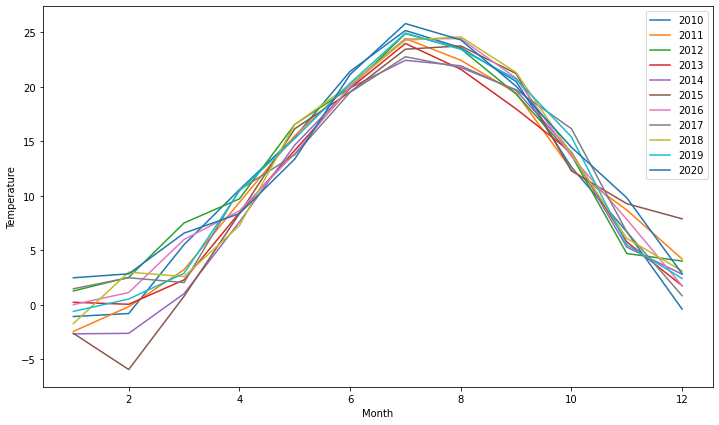

In [14]:
# plot the average temperature per month in different year
plt.figure(figsize=(12, 7))
sns.lineplot(data=solar_data_group_year_2010, x="Month", y="Temperature", label = "2010")
sns.lineplot(data=solar_data_group_year_2011, x="Month", y="Temperature", label = "2011")
sns.lineplot(data=solar_data_group_year_2012, x="Month", y="Temperature", label = "2012")
sns.lineplot(data=solar_data_group_year_2013, x="Month", y="Temperature", label = "2013")
sns.lineplot(data=solar_data_group_year_2014, x="Month", y="Temperature", label = "2014")
sns.lineplot(data=solar_data_group_year_2015, x="Month", y="Temperature", label = "2015")
sns.lineplot(data=solar_data_group_year_2016, x="Month", y="Temperature", label = "2016")
sns.lineplot(data=solar_data_group_year_2017, x="Month", y="Temperature", label = "2017")
sns.lineplot(data=solar_data_group_year_2018, x="Month", y="Temperature", label = "2018")
sns.lineplot(data=solar_data_group_year_2019, x="Month", y="Temperature", label = "2019")
sns.lineplot(data=solar_data_group_year_2020, x="Month", y="Temperature", label = "2020")
plt.legend();


In [15]:
# See the correlation plot
solar_data_group_year.corr()

,Temperature,Solar Zenith Angle,Month,Year
Temperature,1.000000,-0.790195,0.346016,0.025605
Solar Zenith Angle,-0.790195,1.000000,0.138705,-0.000495
Month,0.346016,0.138705,1.000000,0.000000
Year,0.025605,-0.000495,0.000000,1.000000


# In the future, I will join the data frame based on the rooftool data latitude and longitude and will calculate the radition intensity.


# I plan to use this paper:
# https://iopscience.iop.org/article/10.1088/1748-9326/aaa554